# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Nguyễn Hồ Đăng Duy 
- MSSV: 22127085
- Lớp: 22CLC09

## Import các thư viện liên quan

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Helper functions

In [27]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''
    
    im = Image.open(img_path)
    img_2d = np.array(im)
    return img_2d
    

def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''
    
    plt.imshow(img_2d)
    plt.axis('off')
    plt.show()
    

def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''

    # Check if img_path ends with '/' or '\', and add '/' if not
    if not img_path.endswith('/') and not img_path.endswith('\\'):
        img_path += '/'
    
    img = Image.fromarray(img_2d)
    
    # Ask user to choose the export type
    export_type = input("Enter the file type want to save (jpg, jpeg, png or pdf): ")
    if export_type != 'png' and export_type != 'pdf' and export_type != 'jpg' and export_type != 'jpeg':
        print("Invalid file type")
    else:
        img_path += 'Color-compressive-result.' + export_type
    
    img.save(img_path)
    

def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''
    
    img_1d = img_2d.reshape((-1, img_2d.shape[2]))
    return img_1d

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''
    
    if init_centroids == 'random':
        centroids = np.random.randint(0, 256, size=(k_clusters, img_1d.shape[1]))
    elif init_centroids == 'in_pixels':
        centroids = img_1d[np.random.choice(img_1d.shape[0], k_clusters, replace=False)]
    else:
        raise ValueError("init_centroids must be 'random' or 'in_pixels'")

    for _ in range(max_iter):
        # Compute distances and assign clusters
        distances = np.linalg.norm(img_1d[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        # new_centroids = np.array([img_1d[labels == k].mean(axis=0) for k in range(k_clusters)])
        new_centroids = np.array([
            centroids[k] if np.sum(
                labels == k) == 0 else img_1d[labels == k].mean(axis=0, dtype=int)
            for k in range(k_clusters)
        ])
        # If centroids do not change, break the loop
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''

    img_2d = centroids[labels].reshape(img_2d_shape).astype(np.uint8)
    return img_2d

# Your additional functions here
def comparision(original, result, k_clusters):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(original)
    ax[0].axis('off')
    ax[0].set_title(f"Original Image", size=16)

    ax[1].imshow(result)
    ax[1].set_title("Compressed - "+str(k_clusters)+" colors", size=16)
    ax[1].axis('off')

## Your tests

In [28]:
# YOUR CODE HERE

## Main FUNCTION

In [29]:
def main():
    img_path = input('Enter the path of the image: ')
    
    # Read the image
    img_2d = read_img(img_path)
    print('Original image:')
    show_img(img_2d)

    # Convert the image to 1D
    img_1d = convert_img_to_1d(img_2d)

    # Apply K-means clustering
    k_clusters = int(input('Enter the number of clusters: '))
    max_iter = 100
    centroids, labels = kmeans(img_1d, k_clusters, max_iter)

    # Generate the new 2D image
    img_2d_shape = img_2d.shape
    new_img_2d = generate_2d_img(img_2d_shape, centroids, labels)

    # Show and save the new image
    output_path = input('Enter the path to save the result:')
    print('Color compression with k clusters = ', k_clusters, ':')
    show_img(new_img_2d)
    save_img(new_img_2d, output_path)
    
    # Comparision
    print('Compare the original and compressed image:')
    comparision(img_2d, new_img_2d, k_clusters)

Original image:


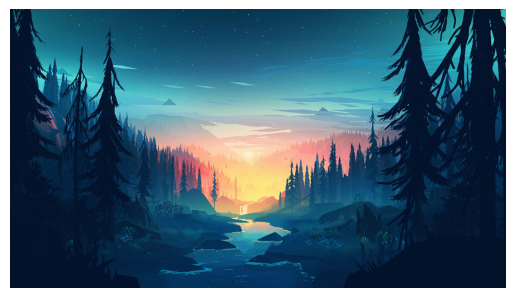

Color compression with k clusters =  7 :


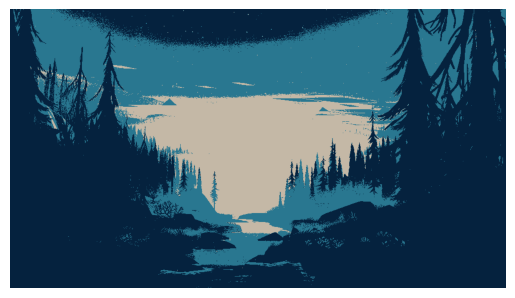

Compare the original and compressed image:


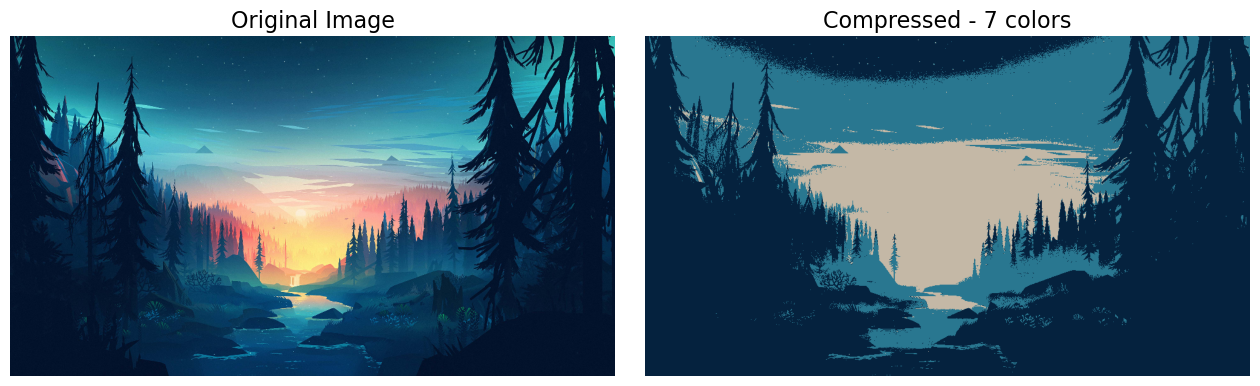

In [30]:
# Call main function
if __name__ == "__main__":
    main()